In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ndcg_score

In [3]:
df = pd.read_csv('../src/intern_task.csv')

# EDA

In [ ]:
df.head(5)

,rank,query_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143
0,0,10,1.0,0.0,1.0,3.0,3.0,0.333333,0.0,0.333333,...,0.0,0.000000,0.454545,0.890238,8.655534,1.000000,0.077778,0.002222,1.0,0.333333
1,1,10,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,...,0.0,0.000000,0.000000,0.773976,23.130514,0.000000,0.027826,0.000430,44.0,14.666667
2,0,10,3.0,0.0,2.0,0.0,3.0,1.000000,0.0,0.666667,...,0.0,0.000000,0.000000,0.918308,13.351339,0.000000,0.014925,0.000104,22.0,7.333333
3,1,10,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,...,0.0,0.000000,0.000000,0.975355,18.240926,0.000000,0.053140,0.000255,8.0,2.666667
4,2,10,3.0,0.0,3.0,1.0,3.0,1.000000,0.0,1.000000,...,273.0,79.670665,0.200000,0.990119,31.786048,0.333333,0.046512,0.000307,24.0,8.000000


In [ ]:
len(df["query_id"].unique())

29

In [ ]:
df.shape

(3262, 146)

In [92]:
print(df.isna().values.any())
df.isnull().sum().sum()

True


32

Дропнем пропуски - благо их немного

In [4]:
df = df.dropna()
df.isnull().sum().sum()

0

#### Статистики:

In [95]:
df.describe()

,rank,query_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143
count,3261.000000,3261.000000,3261.000000,3261.000000,3261.000000,3261.000000,3261.000000,3261.000000,3261.000000,3261.000000,...,3261.000000,3261.000000,3261.000000,3261.000000,3261.000000,3261.000000,3261.000000,3261.000000,3261.000000,3261.000000
mean,0.625268,231.665133,2.436983,0.270163,1.559031,0.521312,2.471021,0.865282,0.095686,0.577446,...,217.774916,10.154033,0.066784,0.802531,14.085246,0.207835,0.024089,0.000203,25.567617,8.766483
std,0.787961,118.525978,1.327424,0.777164,1.310632,0.852238,1.295641,0.292046,0.255571,0.410468,...,9685.365859,28.759422,0.109253,0.295398,17.835838,0.337099,0.026088,0.000870,34.305736,9.872095
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,130.000000,2.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.784930,0.000000,0.000000,0.007344,0.000000,6.000000,2.500000
50%,0.000000,235.000000,2.000000,0.000000,2.000000,0.000000,2.000000,1.000000,0.000000,0.666667,...,0.000000,0.000000,0.000000,0.926128,11.118844,0.000000,0.018519,0.000019,15.000000,6.000000
75%,1.000000,325.000000,3.000000,0.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,...,1.000000,3.000000,0.125000,0.993812,18.128888,0.333333,0.032043,0.000131,33.000000,11.333333
max,4.000000,430.000000,6.000000,6.000000,6.000000,6.000000,6.000000,1.000000,1.000000,1.000000,...,552422.000000,379.000000,0.769231,1.000000,361.014684,1.000000,0.333333,0.030625,425.000000,111.000000


#### Как выглядит распределение данных внутри каждого rank-кластера

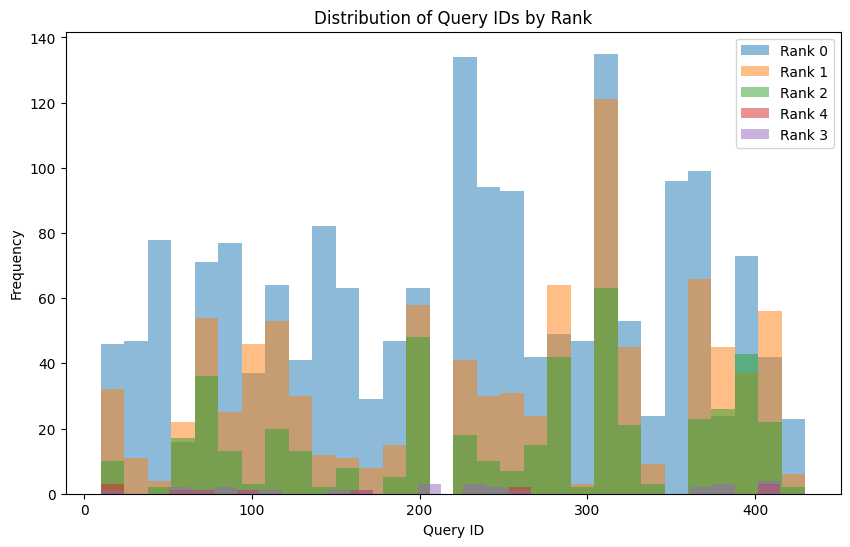

In [ ]:
plt.figure(figsize=(10, 6))
for rank_value in df['rank'].unique():
    plt.hist(df[df['rank'] == rank_value]['query_id'], bins=30, alpha=0.5, label=f'Rank {rank_value}')

plt.xlabel('Query ID')
plt.ylabel('Frequency')
plt.title('Distribution of Query IDs by Rank')
plt.legend()
plt.show()

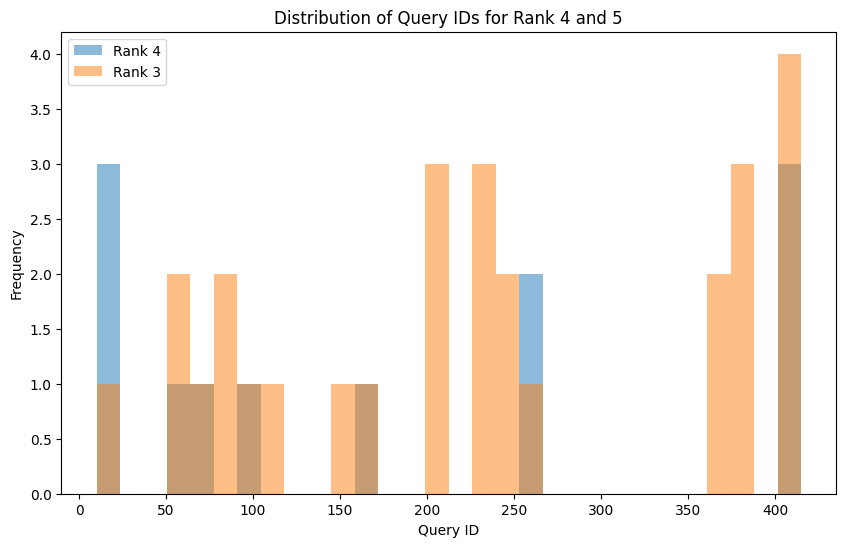

In [ ]:
filtered_df = df[df['rank'].isin([4, 3])]

plt.figure(figsize=(10, 6))
for rank_value in filtered_df['rank'].unique():
    plt.hist(filtered_df[filtered_df['rank'] == rank_value]['query_id'], bins=30, alpha=0.5, label=f'Rank {rank_value}')

plt.xlabel('Query ID')
plt.ylabel('Frequency')
plt.title('Distribution of Query IDs for Rank 4 and 5')
plt.legend()
plt.show()

Виден сильный дисбаланс - нужно будет семплирование

#### Поиск фичей, похожих на категориальные

In [96]:
#pd.set_option('display.max_rows', None)
df.nunique()

rank              5
query_id         29
feature_0         7
feature_1         7
feature_2         7
               ... 
feature_139      13
feature_140    2637
feature_141     611
feature_142     167
feature_143     309
Length: 146, dtype: int64

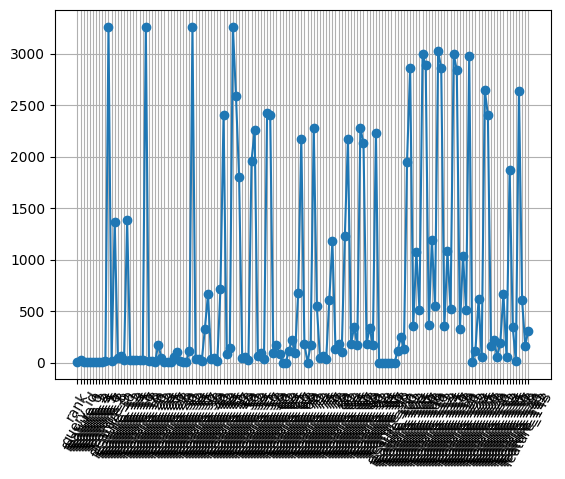

In [97]:
import matplotlib.pyplot as plt
unique_counts = df.nunique()

plt.plot(unique_counts.index, unique_counts.values, marker='o')
plt.xticks(rotation=60)
plt.grid(True)
plt.show()

* Видим, что есть колонки с единственным уникальным значением. И такие, что каждое значение в них уникально. Такие колонки можно не рассматривать
* Также есть колонки с 2 уникальными значениями - вероятно, бинарный признак

In [5]:
unique_counts = df.nunique()

binary_features = list(unique_counts[unique_counts == 2].index)

unused_features = list(unique_counts[unique_counts == 1].index)
unused_features += list(unique_counts[unique_counts == df.shape[0]].index)
unused_features

['feature_64',
 'feature_65',
 'feature_72',
 'feature_100',
 'feature_8',
 'feature_20',
 'feature_35',
 'feature_48']

проверка бинарных фичей - гипотеза подтвердилась

In [161]:
for f in binary_features:
  print(df[f].unique())

[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]


проверка фичей со всеми или только 1 уникальным значением

In [162]:
for f in unused_features:
  print(df[f].unique())

[0]
[0]
[1]
[0]
[0.00000000e+00 4.25067054e-03 8.50134109e-03 ... 1.38486846e+01
 1.38529353e+01 1.38571860e+01]
[0.00000000e+00 4.25067054e-06 8.50134109e-06 ... 1.38486846e-02
 1.38529353e-02 1.38571860e-02]
[0.00000000e+00 8.50134109e+00 1.70026822e+01 ... 2.76973693e+04
 2.77058706e+04 2.77143719e+04]
[4.82251955 3.44596454 4.60147643 ... 4.91408239 7.08387625 6.70106637]


Поиск фичей со множеством нулевых/одинаковых значений

In [6]:
# доля уникальных значений в фичах
unique_ratios = df.nunique() / len(df)

# будем дропать те, в которых 99% значений одинаковые
unused_features += list(unique_ratios[unique_ratios < 0.01].index)
unused_features = list(set(unused_features))
unused_features

['feature_56',
 'feature_95',
 'feature_37',
 'feature_133',
 'feature_131',
 'rank',
 'feature_136',
 'feature_31',
 'feature_25',
 'feature_98',
 'feature_24',
 'feature_66',
 'feature_21',
 'feature_134',
 'feature_30',
 'feature_143',
 'feature_48',
 'feature_62',
 'feature_58',
 'feature_72',
 'feature_8',
 'feature_7',
 'feature_11',
 'feature_97',
 'feature_67',
 'feature_39',
 'feature_99',
 'feature_139',
 'feature_36',
 'feature_42',
 'feature_26',
 'feature_61',
 'feature_29',
 'feature_28',
 'feature_142',
 'feature_63',
 'feature_64',
 'feature_6',
 'feature_53',
 'feature_34',
 'feature_5',
 'feature_20',
 'feature_17',
 'feature_27',
 'feature_46',
 'feature_32',
 'feature_22',
 'feature_96',
 'query_id',
 'feature_57',
 'feature_13',
 'feature_52',
 'feature_0',
 'feature_125',
 'feature_33',
 'feature_9',
 'feature_15',
 'feature_47',
 'feature_51',
 'feature_23',
 'feature_68',
 'feature_35',
 'feature_12',
 'feature_126',
 'feature_1',
 'feature_16',
 'feature_43',
 

Внутри каждого rank виден один и тот же паттерн по фичам, несмотря на дисбаланс классов. Наблюдать такое хорошо, не нужно будет по-разному нормировать данные отдельно для каждого ранка

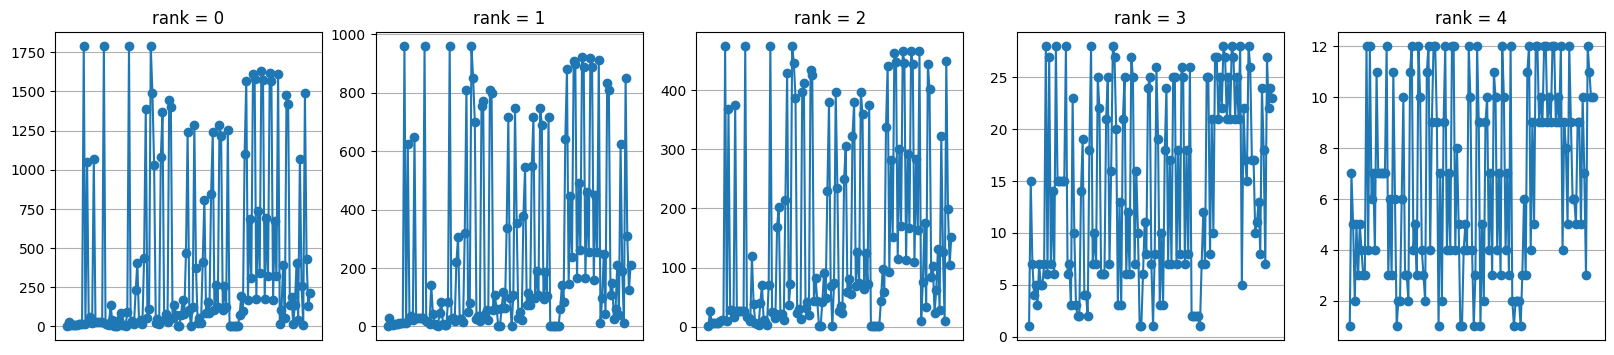

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for r in range(5):
  view_unique_counts = df[df['rank'] == r].nunique()

  axes[r].plot(view_unique_counts.index, view_unique_counts.values, marker='o')
  axes[r].set_xticks([])
  axes[r].set_title(f"rank = {r}")
  axes[r].grid(True)
plt.show()

Собираем категориальные фичи

In [ ]:
categorical_features = []

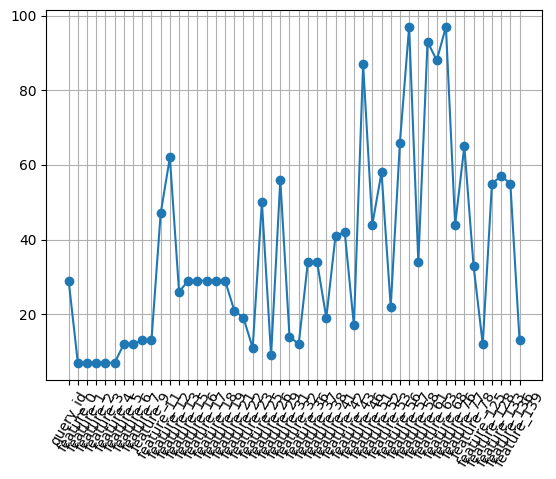

In [ ]:
n=100
low_unique_cols = unique_counts[(unique_counts > 5)][(unique_counts < n)]
plt.plot(low_unique_cols.index, low_unique_cols.values, marker='o')
plt.xticks(rotation=60)  # Поворот названий колонок для лучшей читаемости
plt.grid(True)
plt.show()

In [ ]:
categorical_features += list(unique_counts[unique_counts >5][unique_counts <= 20].index)
messy_categorical_features = list(unique_counts[unique_counts > 20][unique_counts < 100].index)

In [ ]:
features_to_drop = list(set(categorical_features+ messy_categorical_features+ binary_features+ unused_features))

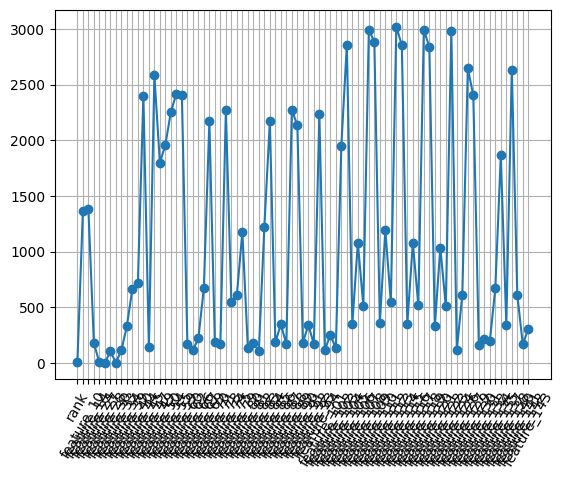

In [ ]:
df_without_categorical = df
df_without_categorical = df_without_categorical.drop(columns=features_to_drop)

plt.plot(df_without_categorical.nunique().index, df_without_categorical.nunique().values, marker='o')
plt.xticks(rotation=60)
plt.grid(True)
plt.show()


Кажется,признаки можно рассмотреть по кластерам, согласно распределению значений

[]


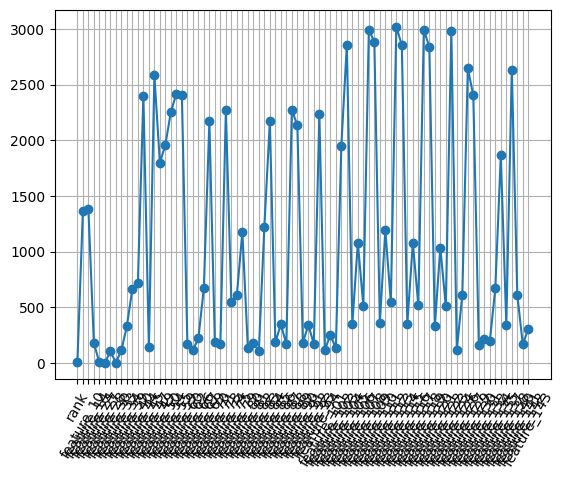

In [ ]:
nlargest_unique_cols = list(df_without_categorical.nunique()[(unique_counts > 150000)].index)
print(nlargest_unique_cols)

df_to_view = df_without_categorical.drop(columns=nlargest_unique_cols)
plt.plot(df_to_view.nunique().index, df_to_view.nunique().values, marker='o')
plt.xticks(rotation=60)
plt.grid(True)
plt.show()

[]


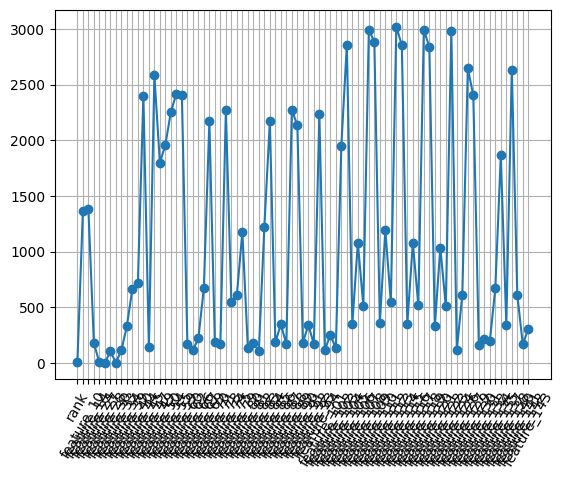

In [ ]:
nlargest_unique_cols = list(df_without_categorical.nunique()[(unique_counts > 150000)].index)
print(nlargest_unique_cols)

df_to_view = df_without_categorical.drop(columns=nlargest_unique_cols)
plt.plot(df_to_view.nunique().index, df_to_view.nunique().values, marker='o')
plt.xticks(rotation=60)
plt.grid(True)
plt.show()

In [ ]:
categorical_features = list(set(categorical_features))
features_to_drop = list(set(categorical_features+ messy_categorical_features+ binary_features+ unused_features))

In [ ]:
categorical_features

['feature_31',
 'feature_32',
 'feature_2',
 'feature_0',
 'feature_22',
 'feature_3',
 'feature_7',
 'feature_23',
 'feature_125',
 'feature_139',
 'feature_43',
 'feature_26',
 'feature_6',
 'feature_4',
 'feature_38',
 'feature_5',
 'feature_1',
 'feature_9']

In [ ]:
# убираем не-фичи
#categorical_features.remove('rank')

In [ ]:
df[categorical_features].nunique()

feature_31     14
feature_32     12
feature_2       7
feature_0       7
feature_22     19
feature_3       7
feature_7      13
feature_23     11
feature_125    12
feature_139    13
feature_43     17
feature_26      9
feature_6      12
feature_4       7
feature_38     19
feature_5      12
feature_1       7
feature_9      13
dtype: int64

Проверим скореллированность фичей

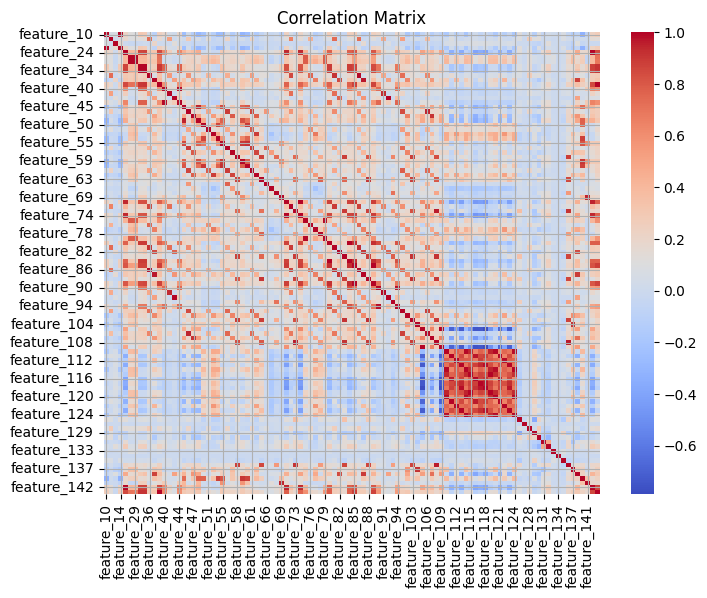

In [225]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(df.drop(columns=unused_features).corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.grid()
plt.title('Correlation Matrix')
plt.show()

In [232]:
list(set(unused_features))

['feature_19',
 'feature_22',
 'feature_7',
 'feature_23',
 'feature_97',
 'feature_28',
 'feature_27',
 'feature_13',
 'feature_38',
 'feature_65',
 'feature_98',
 'feature_31',
 'feature_9',
 'feature_18',
 'feature_96',
 'feature_100',
 'feature_99',
 'feature_26',
 'feature_53',
 'feature_72',
 'feature_4',
 'feature_5',
 'feature_16',
 'feature_33',
 'feature_3',
 'rank',
 'feature_125',
 'feature_20',
 'feature_6',
 'feature_64',
 'feature_17',
 'feature_8',
 'query_id',
 'feature_2',
 'feature_0',
 'feature_15',
 'feature_139',
 'feature_48',
 'feature_95',
 'feature_21',
 'feature_35',
 'feature_32',
 'feature_43',
 'feature_1']

кластеры довольно небольшие, к тому же рассматриваемые модели сами смогут отфильтровать скореллированные фичи, уменьшив их веса во время обучения. Зачастую издавление от подобных корелляций даже немного просаживает итоговый скор при использовании Catboost и других популярных бустинговых моделей, поскольку заложенные в моделях алгоритмы отбора фичей несколько сложнее простого избавления от скореллированных признаков, и работают лучше без "посторонней помощи"

* Собранные фичи с единственным уникальным значением и со всеми уникальными значениями рассматривать не будем
* Колонки с небольшим количеством уникальных значений попробуем рассмотреть как категориальные
* Потенциально категориальных фичей довольно много, поэтому делаем ставку на Catboost и подобные

> Несмотря на планы с деревянными моделями, хотелось бы исследовать, как повлияет на результат нивелирование дисбаланса классов и исправление других особенностей датасета. Возможно, на исправленном датасете и деревянные модели будут сходиться лучше

# Подготовка датасета

In [7]:
filtered_df = df.drop(columns=unused_features) # дропнем ненужные фичи
filtered_df['rank'] = df['rank']
filtered_df['query_id'] = df['query_id']
filtered_df.shape

(235258, 69)

In [165]:

filtered_df.head(5)

,feature_10,feature_11,feature_12,feature_14,feature_24,feature_25,feature_29,feature_30,feature_34,feature_36,...,feature_135,feature_136,feature_137,feature_138,feature_140,feature_141,feature_142,feature_143,rank,query_id
0,10.0,0.0,9.0,30.0,7.0,0.0,1.0,1.0,4.0,0.0,...,0.000000,0.454545,0.890238,8.655534,0.077778,0.002222,1.0,0.333333,0,10
1,557.0,0.0,7.0,575.0,48.0,6.0,7.0,31.0,33.0,0.0,...,0.000000,0.000000,0.773976,23.130514,0.027826,0.000430,44.0,14.666667,1,10
2,522.0,0.0,6.0,536.0,24.0,1.0,1.0,14.0,15.0,0.0,...,0.000000,0.000000,0.918308,13.351339,0.014925,0.000104,22.0,7.333333,0,10
3,59.0,0.0,5.0,69.0,11.0,2.0,3.0,4.0,5.0,0.0,...,0.000000,0.000000,0.975355,18.240926,0.053140,0.000255,8.0,2.666667,1,10
4,203.0,0.0,7.0,215.0,30.0,3.0,4.0,11.0,14.0,0.0,...,79.670665,0.200000,0.990119,31.786048,0.046512,0.000307,24.0,8.000000,2,10


In [166]:
filtered_df.drop(columns='rank').isna().sum().sum()

0

### Семплирование

* Важно, чтобы в трейн и тест попали в равной мере все классы. Один из способов сделать это - under/over-sampling с последующим перемешиванием данных и разделением на тестовую и обучающую выборки

In [ ]:
%pip install imblearn

In [10]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Разделение данных на обучающую и тестовую выборки с шафлом
X_train, X_test, y_train, y_test = train_test_split(filtered_df.drop(columns='rank'), filtered_df['rank'], test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_over_resampled, y_over_resampled = smote.fit_resample(X_train, y_train)

undersampler = RandomUnderSampler(random_state=42)
X_under_resampled, y_under_resampled = undersampler.fit_resample(X_train, y_train)


<ipython-input-168-efea0f82c23f>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  over_resampled_df['rank'] = y_over_resampled


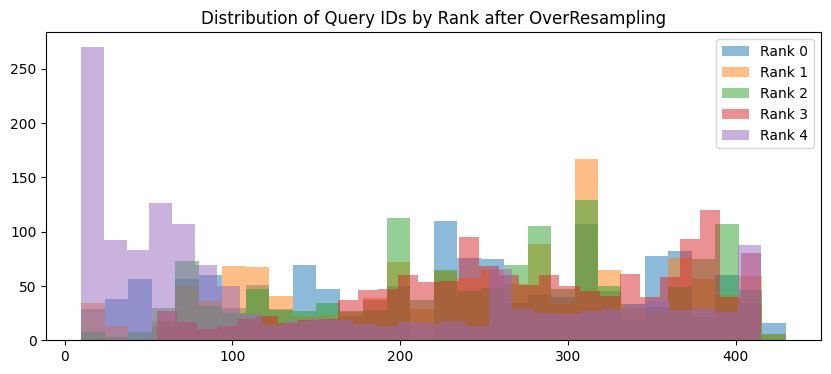

In [168]:
import numpy as np

plt.figure(figsize=(10, 4))

over_resampled_df = X_over_resampled
over_resampled_df['rank'] = y_over_resampled
for rank_value in np.unique(y_over_resampled):
    plt.hist(over_resampled_df[over_resampled_df['rank'] == rank_value]['query_id'], bins=30, alpha=0.5, label=f'Rank {rank_value}')

plt.title('Distribution of Query IDs by Rank after OverResampling')
plt.legend()
plt.show()

<ipython-input-169-c449d40c7789>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  under_resampled_df['rank'] = y_under_resampled


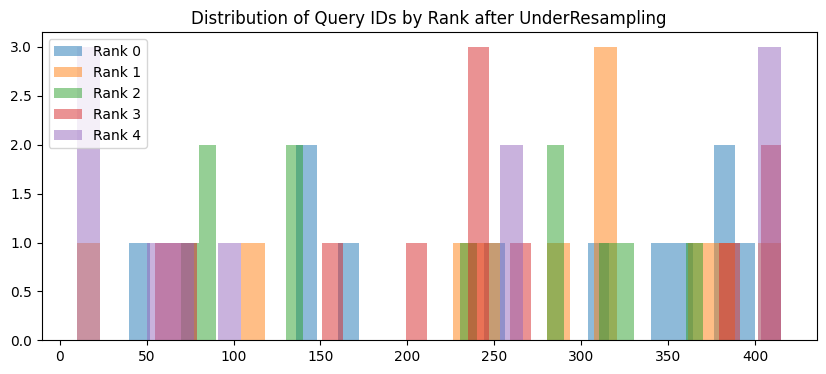

In [169]:
plt.figure(figsize=(10, 4))

under_resampled_df = X_under_resampled
under_resampled_df['rank'] = y_under_resampled
for rank_value in np.unique(y_over_resampled):
    plt.hist(under_resampled_df[under_resampled_df['rank'] == rank_value]['query_id'], bins=30, alpha=0.5, label=f'Rank {rank_value}')

plt.title('Distribution of Query IDs by Rank after UnderResampling')
plt.legend()
plt.show()

### Модель должна смотреть на историю того же query_id.

Необходимо, если не реализовать механизм внимания, то хотя бы добавить GroupFold

Разделение на train-val-test c GroupFold

In [11]:
import pandas as pd
from sklearn.model_selection import GroupKFold

X = filtered_df.drop(['query_id', 'rank'], axis=1)
y = filtered_df['rank']

# Создание GroupKFold для кросс-валидации с группировкой по query_id
group_kfold = GroupKFold(n_splits=5)
groups = filtered_df['query_id']

In [12]:
# аналогично для семплированных данных
X_resampled = X_over_resampled.drop(['query_id'], axis=1)
y_resampled = y_over_resampled

# Создание GroupKFold для кросс-валидации с группировкой по query_id
group_kfold_resampled = GroupKFold(n_splits=5)
groups_resampled = X_over_resampled['query_id']

# Эксперименты с моделями

In [ ]:
%pip install catboost lightgbm

### CatBoost

На исходных данных

0:	test: 0.3140222	best: 0.3140222 (0)	total: 428ms	remaining: 7m 7s
100:	test: 0.3914979	best: 0.4251313 (9)	total: 32s	remaining: 4m 44s
200:	test: 0.3736149	best: 0.4251313 (9)	total: 59.9s	remaining: 3m 58s
300:	test: 0.3722449	best: 0.4251313 (9)	total: 1m 28s	remaining: 3m 25s
400:	test: 0.3639999	best: 0.4251313 (9)	total: 1m 56s	remaining: 2m 54s
500:	test: 0.3940328	best: 0.4251313 (9)	total: 2m 24s	remaining: 2m 23s
600:	test: 0.3912180	best: 0.4251313 (9)	total: 2m 51s	remaining: 1m 54s
700:	test: 0.3924812	best: 0.4251313 (9)	total: 3m 19s	remaining: 1m 25s
800:	test: 0.4013636	best: 0.4251313 (9)	total: 3m 46s	remaining: 56.4s
900:	test: 0.4069720	best: 0.4251313 (9)	total: 4m 14s	remaining: 27.9s
999:	test: 0.4069720	best: 0.4251313 (9)	total: 4m 41s	remaining: 0us

bestTest = 0.4251313045
bestIteration = 9

Shrink model to first 10 iterations.
0:	test: 0.2627316	best: 0.2627316 (0)	total: 449ms	remaining: 7m 28s
100:	test: 0.3803577	best: 0.5313406 (3)	total: 29.6s	remai

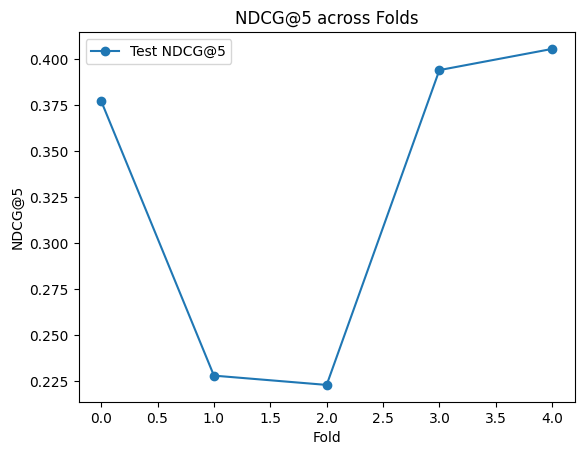

In [175]:
from catboost import CatBoostRanker, Pool
import numpy as np

params = {
    'iterations': 1000,
    'learning_rate': 0.1,
    'depth': 6,
    'loss_function': 'YetiRankPairwise',  # Используем функцию потерь для ранжирования
    'eval_metric': 'NDCG:top=5'#,
    #'custom_metric': ['NDCG:top=5', 'MAP:top=5', 'PrecisionAt:top=5', 'F1:top=5', 'RecallAt:top=5']
}

train_ndcg5 = []
test_ndcg5 = []
ndcg_scores=[]

for train_index, test_index in group_kfold.split(X, y, groups):
    groups = groups.sort_values()
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    train_pool = Pool(data=X_train, label=y_train, group_id=groups.iloc[train_index])
    test_pool = Pool(data=X_test, label=y_test, group_id=groups.iloc[test_index])

    model = CatBoostRanker(**params)
    model.fit(train_pool, eval_set=test_pool, verbose=100)

    y_pred_test = model.predict(test_pool)
    ndcg_score_test = ndcg_score([y_test], [y_pred_test], k=5)

    test_ndcg5.append(ndcg_score_test)

#plt.plot(train_ndcg5, label='Train NDCG@5')
plt.plot(test_ndcg5, label='Test NDCG@5', marker='o')
plt.xlabel('Fold')
plt.ylabel('NDCG@5')
plt.title('NDCG@5 across Folds')
plt.legend()
plt.show()


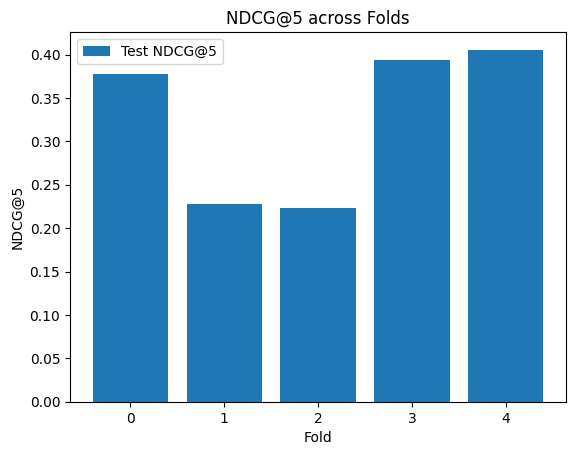

In [176]:
plt.bar(range(len(test_ndcg5)), test_ndcg5, label='Test NDCG@5')
plt.xlabel('Fold')
plt.ylabel('NDCG@5')
plt.title('NDCG@5 across Folds')
plt.legend()
plt.show()

Пока что такой результат слишком мал

Семплированные данные:

In [ ]:
from catboost import CatBoostRanker, Pool
import numpy as np

params = {
    'iterations': 1000,
    'learning_rate': 0.1,
    'depth': 6,
    'loss_function': 'YetiRankPairwise',
    'eval_metric': 'NDCG:top=5'
}

train_ndcg5 = []
test_ndcg5 = []
ndcg_scores=[]

for train_index, test_index in group_kfold.split(X_resampled, y_resampled, groups_resampled):
    groups_resampled = groups_resampled.sort_values()
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    X_train, X_val, y_train, y_val, groups_train, groups_val = train_test_split(X_train, y_train, groups_resampled.iloc[train_index], test_size=0.2, random_state=42)

    groups_train_sorted = groups_train.sort_values()
    groups_val_sorted = groups_val.sort_values()
    groups_test_sorted = groups_resampled.iloc[test_index]#.sort_values()

    train_pool = Pool(data=X_train, label=y_train, group_id=groups_train_sorted)
    val_pool = Pool(data=X_val, label=y_val, group_id=groups_val_sorted)
    test_pool = Pool(data=X_test, label=y_test, group_id=groups_test_sorted)

    # Обучение модели с тестированием на валидационных данных
    model = CatBoostRanker(**params)
    model.fit(train_pool, eval_set=val_pool, verbose=100)

    # Оценка на тесте
    y_pred_test = model.predict(test_pool)
    ndcg_score_test = ndcg_score([y_test], [y_pred_test], k=5)

    test_ndcg5.append(ndcg_score_test)



**На семплированных данных NDCG5: 0.7**

### LightGBM

На исходных данных

In [182]:
from lightgbm import Dataset, train

group_kfold_base = KFold(n_splits=5, shuffle=True, random_state=42)

params = {
        'objective': 'lambdarank',
        'metric': 'ndcg', # NDCG:top=5
        'ndcg_eval_at': [5],
        'boosting_type': 'gbdt',
        'learning_rate': 0.1,
        'num_leaves': 25,
        'min_data_in_leaf': 15,
        'num_iterations': 400,
        'verbose': -1
    }


ndcg_5_scores = []

for train_index, test_index in group_kfold_base.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    train_query_id, test_query_id = groups.iloc[train_index], groups.iloc[test_index]

    train_group = train_query_id.value_counts().sort_index().values
    valid_group = test_query_id.value_counts().sort_index().values

    train_data = Dataset(X_train, label=y_train, group=train_group)
    validation_data = Dataset(X_test, label=y_test, group=valid_group)

    model = train(
        params,
        train_data,
        valid_sets=[validation_data]
    )

    y_pred = model.predict(X_test, num_iteration=model.best_iteration)

    ndcg_score_val = ndcg_score([y_test], [y_pred], k=5)
    ndcg_5_scores.append(ndcg_score_val)

ndcg_5_scores

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[0.5336659212273452,
 0.48066222845878703,
 0.15714023046105882,
 0.8318243739317356,
 0.7437719656259862,
 0.5336659212273452,
 0.48066222845878703,
 0.15714023046105882,
 0.8318243739317356,
 0.7437719656259862]

In [188]:
np.mean(ndcg_5_scores)

0.5494129439409825

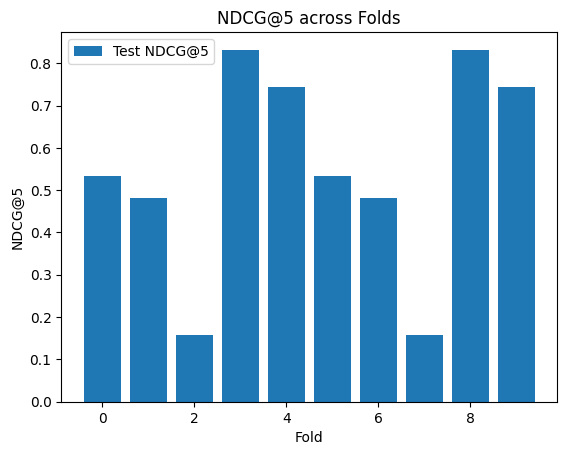

In [183]:
plt.bar(range(len(ndcg_scores)), ndcg_scores, label='Test NDCG@5')
plt.xlabel('Fold')
plt.ylabel('NDCG@5')
plt.title('NDCG@5 across Folds')
plt.legend()
plt.show()

несколько лучше

Теперь на семплированных данных

In [ ]:
%pip install lightgbm

In [17]:
from lightgbm import Dataset, train
from sklearn.model_selection import KFold

group_kfold_base = KFold(n_splits=5, shuffle=True, random_state=42)

params = {
        'objective': 'lambdarank',
        'metric': 'ndcg', # NDCG:top=5
        'ndcg_eval_at': [5],
        'boosting_type': 'gbdt',
        'learning_rate': 0.1,
        'num_leaves': 25,
        'min_data_in_leaf': 15,
        'num_iterations': 1000,
        'verbose': -1
    }


ndcg_5_scores = []

for train_index, test_index in group_kfold_base.split(X_resampled):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]
    train_query_id, test_query_id = groups_resampled.iloc[train_index], groups_resampled.iloc[test_index]

    train_group = train_query_id.value_counts().sort_index().values
    valid_group = test_query_id.value_counts().sort_index().values

    train_data = Dataset(X_train, label=y_train, group=train_group)
    validation_data = Dataset(X_test, label=y_test, group=valid_group)

    model = train(
        params,
        train_data,
        valid_sets=[validation_data]
    )

    y_pred = model.predict(X_test, num_iteration=model.best_iteration)

    ndcg_score_val = ndcg_score([y_test], [y_pred], k=5)
    ndcg_5_scores.append(ndcg_score_val)

c:\Users\Ludmila\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Ludmila\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Ludmila\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Ludmila\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use i

In [20]:
np.mean(ndcg_5_scores)

0.9660839794726381

**Итак, на текущий момент наилучший результат показал LightGbm + oversampling: NDCG@5 = 0.96**

## Итоги

> Лучший скор показал LightGBM. Данные были оверсемплированы

В процессе работы:
* Были рассмотрены классические модели LightGBM и CatBoost, исследовано влияние предобработки датасета на результат их работы. 

* Для данного датасета стало удачным решение нивелировать дисбаланс классов с помощью oversampling. Также во многих экспериментах лучше себя показывала LightGBM. Учитывая проведенный EDA, вероятноб это связано с наличием большого количества фичей, имеющих конечное малое пространство значений, при этом достаточное для того, чтобы усложнить работу с ними, как с категориальными.

* Предобработка данных в результате содержала:
    * Избавление от константных фичей и фичей, все значения в которых уникальны
    * Избавление от фичей, в которых 99% одинаковых (не уникальных) данных 
    * Оверсемплинг

* Для оценки качества использовалась кросс-валидация

Данную задачу можно было бы также решить, например следующими путями:

* Определить важную категориальную фичу (или их набор), обучить несколько моделей для каждой, а на этапе инференса выбирать нужную или близкую, согласно значению этой "ключевой" фичи
* Составить ансамбль моделей
* Использовать нейронки. Например, encoder-only модель, как Bert. Существуют довольно полезные вариации Берта для решения задач, похожих на ранжирование (можно начать с 
bert-base-uncased)

* 